# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

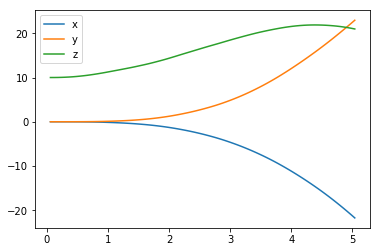

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

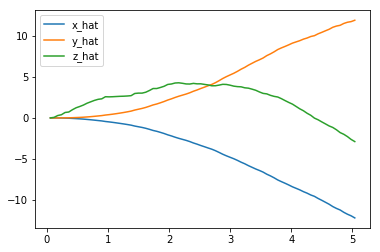

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

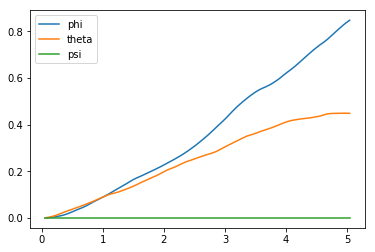

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

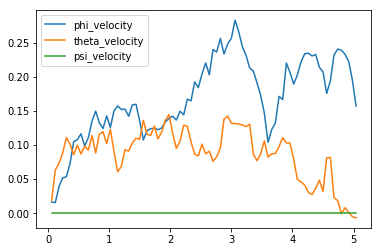

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

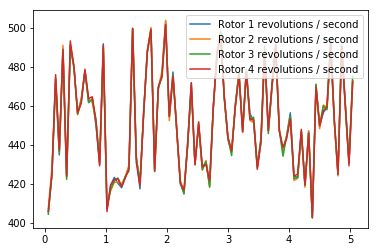

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-21.74133569  22.94908002  20.97678045   0.8471604    0.44827595   0.        ]
[-12.18917471  11.91023553  -2.88252972]
[ 0.15741921 -0.00695648  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.163 (best =  -0.026), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.
import sys
import csv
import pandas as pd
import numpy as np
from collections import deque
from agents.agent import QuadAgent_DDPG
from task import Task

num_episodes = 300
target_pos = np.array([0., 0., 25.])
task = Task(target_pos=target_pos)
agent = QuadAgent_DDPG(task)
best_score = -np.inf
rewards_tracker = []
file_output = 'data.txt'                         # file name for saved results

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

success_count = deque(maxlen = 10)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0.0
    total_reward = 0.0
    count = 0.0
    
    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            count += 1
            total_reward += reward
            
            # Data Logging
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            
            # Episode over if "Done" or Task Success
            if done or task.task_success:
                if task.task_success:
                    success_count.append(1)
                else:
                    success_count.append(0)
                score = total_reward / count
                rewards_tracker.append(score)
                if score > best_score:
                    best_score = score
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}, SC = {:4d})".format(
                    i_episode, score, best_score, success_count.count(1)), end="")  # [debug]
                break
        sys.stdout.flush()
        if success_count.count(1) >= 7:
            break

Using TensorFlow backend.


Episode =  277, score =   4.848 (best =  22.758, SC =    7)))

***Results: The plots below depict the behavior of the agent based on the last episode (success)***

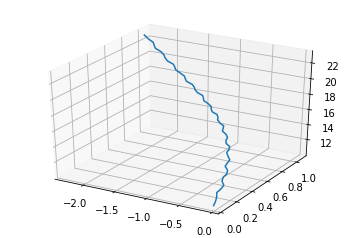

In [30]:
# Plotting the agent behavior in R^3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(results['x'][-55:],results['y'][-55:], results['z'][-55:]);

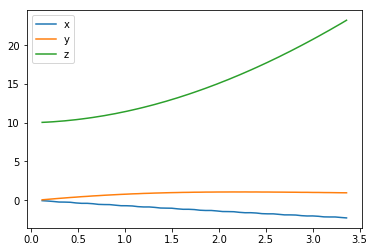

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'][-55:], results['x'][-55:], label='x')
plt.plot(results['time'][-55:], results['y'][-55:], label='y')
plt.plot(results['time'][-55:], results['z'][-55:], label='z')
plt.legend()
_ = plt.ylim()

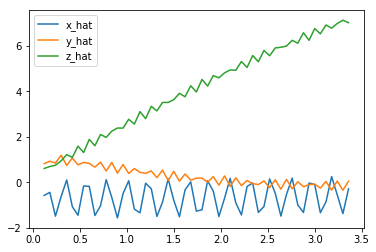

In [23]:
plt.plot(results['time'][-55:], results['x_velocity'][-55:], label='x_hat')
plt.plot(results['time'][-55:], results['y_velocity'][-55:], label='y_hat')
plt.plot(results['time'][-55:], results['z_velocity'][-55:], label='z_hat')
plt.legend()
_ = plt.ylim()

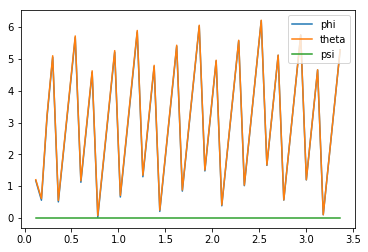

In [22]:
plt.plot(results['time'][-55:], results['phi'][-55:], label='phi')
plt.plot(results['time'][-55:], results['theta'][-55:], label='theta')
plt.plot(results['time'][-55:], results['psi'][-55:], label='psi')
plt.legend()
_ = plt.ylim()

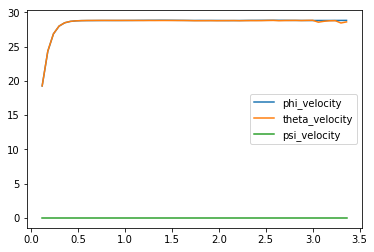

In [20]:
plt.plot(results['time'][-55:], results['phi_velocity'][-55:], label='phi_velocity')
plt.plot(results['time'][-55:], results['theta_velocity'][-55:], label='theta_velocity')
plt.plot(results['time'][-55:], results['psi_velocity'][-55:], label='psi_velocity')
plt.legend()
_ = plt.ylim()

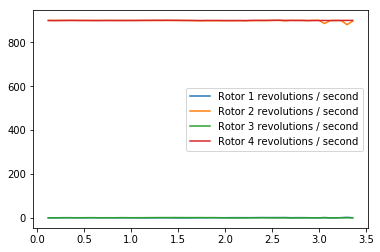

In [21]:
plt.plot(results['time'][-55:], results['rotor_speed1'][-55:], label='Rotor 1 revolutions / second')
plt.plot(results['time'][-55:], results['rotor_speed2'][-55:], label='Rotor 2 revolutions / second')
plt.plot(results['time'][-55:], results['rotor_speed3'][-55:], label='Rotor 3 revolutions / second')
plt.plot(results['time'][-55:], results['rotor_speed4'][-55:], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

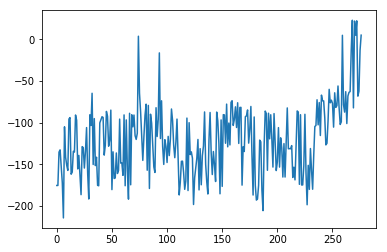

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rewards_tracker)

## Reflections and Discussion

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**The Task**

The reinforcement-learning agent was directed to learn how to "take off" in this task. The initial position was set at (0,0,10) in order to avoid early collision with the simulation floor (x,y,0) and all initial velocities were set to zero. The target destination for the task to be deemed a success was for the agent to reach a height of 25 units:

 $$A_p \in \{(x,y,25) | x \in (-300,300), y \in (-300,300)\}$$
 
In order to allow for some error/noise, an epsilon error margin was added to the target altitude. This would allow an episode to be deemed a success if the agent got within epsilon distance of the target.

**The Reward Function**
$$R_t = -|Agent(z) - Target(z)|$$

A straightforward reward function was used to guide the agent towards the desired destination. This reward function provides proportional feedback given the agent's current position relative to the target position, is differentiable (excluding the discontinuity), and is not sparse. Additional task completion and failure rewards were structured as follows:

$$R_{success} = 1000$$
$$R_{fail} = -1000$$

where success is determined by reaching the target altitude prior to the episode time limit. All other episode completions (out of bounds or out of time) are considered failures and are greatly penalized. Furthermore, a deque was used to track the training success over a 10 episode interval. Once 7 successes were reached within a 10 episode span, the entire training effort was halted and the training considered complete.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.


**Answer**:

**Learning Algorithms**

The Deep Deterministic Policy Gradient (DDPG) algorithm was the only one used in this project. The supplied Actor-Critic and Agent code was lightly modified in order to achieve the above results. Based on (https://arxiv.org/pdf/1804.04154.pdf), it would be interesting to see how successful PPO would be on this and similar tasks.

**Hyperparameters**

The final hyperparameters used can be found below. Most of these parameters were kept as they were "out of the box" for this run. Previous runs involved varying $\tau$ up and down a magnitude to see if it would increase the stability of the learning process and get the agent out of ruts, but it appears that the stated $\tau$ value is adequate. The noise hyperparameters were also experimented with in previous runs, but were reset to the base level for this final run. Decreasing the noise variance too much resulted in poor exploration, but the inverse resulted in very unstable results. Ideally, this noise would be modulated with some kind of decay given the training progress so that mid to end-term training success are not trampled by overly eager exploration.

Learning Algorithm: $\gamma = 0.99$, $\tau = 0.001$

Ornstein-Uhlenbeck process Noise: $\mu = 0.0$, $\theta = 0.15$, $\sigma = 0.2$

Error Margin: $\epsilon = 2.0 m$

**Neural Network Architecture**

An Actor-Critic architecture was implemented for this agent, primarily relying on the provided code foundations. The NN architectures for both are specified below: {Layer type, units, activation}

__Actor:__
{Input, 18}
{Dense, 32, ReLU}
{Dense, 64, ReLU}
{Dense, 32, ReLU}
{Batch Normalization}
{Dense, 4, Sigmoid}
{Lambda}

__Critic:__(state)
{Input, 18}
{Dense, 32, ReLU}
{Dense, 64, ReLU}
{Batch Normalization} ----v

__Critic:__(action)
{Input, 4}
{Dense, 32, ReLU}
{Dense, 64, ReLU}
{Batch Normalization}
{Add(state,action)}
{Activation, ReLu}
{Dense, 1}

Other architectures and variations were investigated to see if they would yield noticeable training improvements. Additional layers, layers with more units (64,128,256,etc), kernel initializers and regularizers, and batch normalization between dense layers did not appear to provide solid training improvements. The agent would often end up crashing into the floor or making very minor movements towards the target location. The more complex architecture was then pared down to the base set provided with the addition of batch normalization after the dense layers. Glorot and He normal kernel initializers were again tested with this more simple model, but the agent never successfully met the training objective. After this, and a number of other small tested variations, it was decided that this simple architecture performed the best for the current agent implementation.

In [10]:
mean_l10 = np.mean(rewards_tracker[-10:])
mean_f10 = np.mean(rewards_tracker[:10])
print("Mean reward for the last 10: {:7.3f}. First 10: {:7.3f} ".format(mean_l10, mean_f10), end = "")

Mean reward for the last 10: -16.358. First 10: -155.805 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task itself is rather simple. All the agent has to do is go up as fast as it can! The act of learning this task, however, also requires the agent to learn how to operate the rotors in a way that produces the desired movement, or any actual movement, for that matter. With the NN architecture and reward structure outlined above, it took approximately 225 episodes before the agent started to earn increasingly better rewards. There appears to have been a sort of "aha" moment where the episode score suddenly spiked to a higher level. The agent had discovered the direction it needed to go in order to obtain a higher reward. The scores after that point continue to increase and the agent eventually triggers the training break condition of successfully rising to the desired altitude in 7 out of the 10 most recent episodes. 

The final performance, which can be seen in the figures above, show that the agent steadily rose to the required height with only a little translation in the x and y directions. It accomplished the task in approximately 3.4 time steps. This final performance was not the best one either since it received a score of 4.8 whereas the best score was 22.8, but it is probably representative enough of the average successful performances. The final 10 episodes, which contain 7 successful ends of the task, had a mean reward of -16.4. For reference, the first 10 episodes of the training event had a mean reward of -155.8 so the final set had a full magnitude better mean reward than the untrained agent.

Overall, the agent has learned how to accomplish the "take-off" task, but the results above still leave a lot of room for improvement. The trajectory seen in the 3D figure depict a very wavy and inconsistant path. This could be due to wind perturbations or perhaps inconsistent control authority directed by the agent to the rotors. The trajectory is also not strictly optimal (neglecting any wind disturbances) as the path does have some translation in the x and y directions. Additional adjustments to the training architecture and implementation would be required to shift the policy towards a more PID/LQR optimal control kind of trajectory.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest parts of the project were toning down expectations and appropriately tweaking parameters. I initially set out to have the agent follow an orbital path by defining some rather complex reward functions; they were structured more like potential functions that would force a particle into a particular path. Some of my initial simulations had _some_ success in that some of the trajectories were helical. This meant that the agent was following the potentials correctly, but did not quite make it to the oribtal plane specified. After a couple days of trying out different combinations of NN layers, intializers, and regularizers, I abandoned the orbital path task and moved to the take-off task. I felt that just getting a more simple task done could act as a stepping stone to more complex tasks. Another day or two later of work saw about as much progress on this task as every change I made to the architecture seemed to make matters worse. The agent was not learning. I reset the entire workspace environment after the simulation started returning NaN values for the state (probably a result of my tinkering) and started again with simplicity in mind. My reward function remained the same, but I added in more direct terminal rewards and pentalties. I also kept the bare minimum for the NN layers and only tweaked the hyperparameters one at a time to see if they improved anything. In the end, the best addition was adding in the deque for tracking successful episodes so that I could terminate training after a certain number of successes were reached. Every other time I trained the agent, it seemed to finally learn and succeed, but would shortly thereafter forget how to win and the score would plummet. Some other students have pointed out that this is likely caused by the replay buffer. A potential workaround would be to modify the code for the replay buffer so that it only admits experiences with scores above some moving average. That way the experiences it re-learns from should only be those that will feasibly improve it. The current implementation is like a rising tennis pro trying to improve their serve by watching their old match videos. Good habits are not going to be reinforced by using outdated and "low-scoring" information.

The agent's behevior was interesting in all of my attempts to train it. When I was attempting to train it to follow an orbital path, I saw a lot of helical trajectories and some arc-like paths. It was essentially riding the edges of the potential fields created by the reward function(s). I also saw the saddening result of not enforcing a failure penalty. The agent would often learn that the optimal solution was to crash as that would yield a better score than actually trying to learn or explore the space. A lot of virtual quadcopters were harmed in the making of this final result. It definitely drives home the idea that the reward system needs to be carefully engineered so that the behavior you want is what leads to a high reward.